# Dhanashree kamtekar

# Task 1 - Prediction Using Supervised Machine Learning Algorithm

Objective:- To predict the score in exam if student study for 9.25 hours in a day

# Simple Linear Regression

In this regression task we will predict the scores of the student based on the number of hours they study. Here predictor variable is score and response variable is hours of study.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
from sklearn import metrics

In [7]:
import seaborn as sns

In [8]:
from scipy import stats

In [9]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"  #import dara
data=pd.read_csv(url)
print("Data import successful")

Data import successful


In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [14]:
data.shape

(25, 2)

In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None


In [16]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# visualization

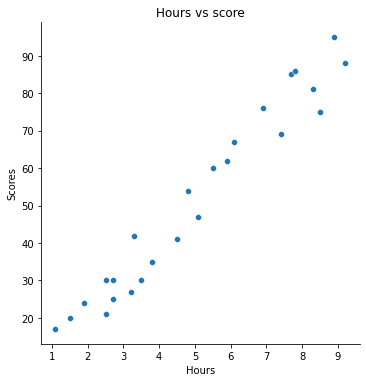

From the above scatter plot  we can see that there exist a linear relationship between the variable


In [17]:
sns.relplot(x='Hours', y='Scores',data=data)  #visualization od data
plt.title("Hours vs score")
plt.show()
print("From the above scatter plot  we can see that there exist a linear relationship between the variable")

C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


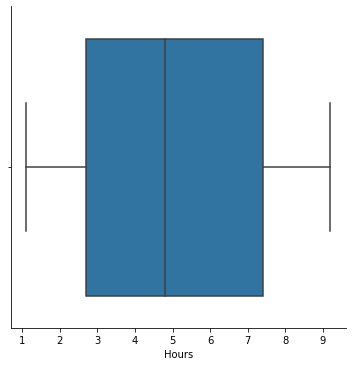

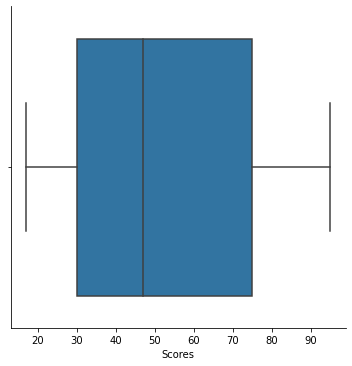

In [19]:
sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')

In [20]:
cor=data.corr()

In [21]:
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


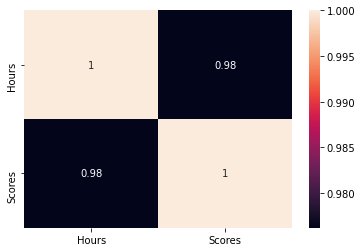

In [22]:
sns.heatmap(cor,annot=True)
plt.show()

From the above heatmap and cor table we clearly see that the strong positive correlation between hours and scores

C:\Users\Dhanashree\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

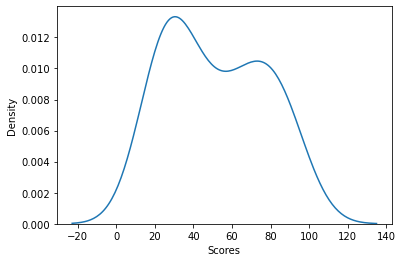

In [24]:
import seaborn as sns
sns.distplot(data['Scores'],hist=False)    #plotting distribution of scores of the data

From the above Kde plot we can see that Scores distributed normally

# preparing the data

In [26]:
x= data.iloc[:, :-1].values

In [27]:
y=data.iloc[:, 1].values

# Train test Split

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0) 

In [30]:
regressor = LinearRegression()

In [31]:
regressor.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [33]:
print(f"The size of the train data and test data is {x_train.size,y_train.size,x_test.size,y_test.size}")

The size of the train data and test data is (20, 20, 5, 5)


In [34]:
print("Training complete")

Training complete


In [35]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [37]:
print(model.coef_), print(model.intercept_)

[9.91065648]
2.018160041434683


(None, None)

# The best fit of the line is score=2.018 +9.912*Hours

# plotting the model

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlab'

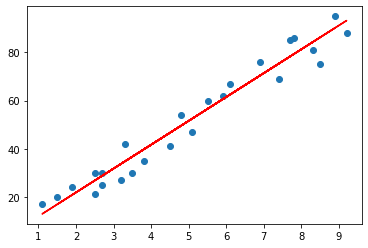

In [40]:
#Plotting the regression line
line=regressor.coef_*x+regressor.intercept_
#plotting for the test data
plt.scatter(x,y)
plt.plot(x,line,color='red');
plt.xlab("Hours of study")
plt.ylab("Scores")
plt.show()

# Prediction

In [41]:
#Testing data
print(x_test)
#model prediction
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


# Step 7- Comparing actual result to the predicted model result

In [42]:
#Comparing actual vs predicted
df =pd.DataFrame({'Actual': y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
#Estimating training and test score 
print("Training score:", regressor.score(x_train,y_train))
print("Test score:", regressor.score(x_test,y_test))


Training score: 0.9515510725211552
Test score: 0.9454906892105356


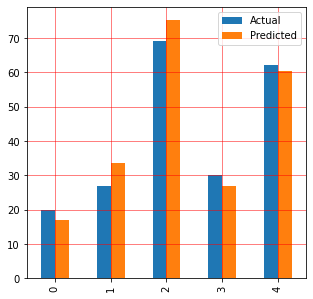

In [44]:
#Plotting the bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='red')
plt.grid(which='minor',linewidth='0.5',color='blue')
plt.show()

In [47]:
import numpy as np
Hours=9.25
predict_Score=model.predict([[Hours]])
predict_Score
print('Number of Hours=9.25')
print("predict Score=",format(predict_Score[0]))

Number of Hours=9.25
predict Score= 93.69173248737538


The value of root mean squared error is 4.647 which is less than 10% of the mean of percentage of all the studnets (51.48)

# Here R-Squared =0.9454 means the model explain 94.54% of the variability in the dependent variable(Score) by independent variable(Hours)

# Thank you